In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt

#To calculate area below the normal distribution and calculate probabilities
from numpy import trapz 
from scipy.integrate import simps



# Exercise p7: Sampling Mean

## Part 1:
- We're considering a population of N = 5 container and their weight as the measure analyzed:
x1=332g, x2=336g, x3=340g, x4=344g et x5=348g

- we'll calculate basic values: Mean/Variance and study the distribution of this very small dataset...

Population mean: 340.0
Population variance: 40.00000000000001


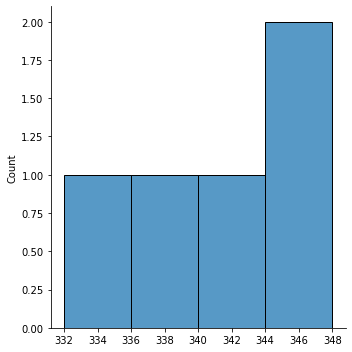

In [13]:
# Step 1: create an array with the values given in the assignment:
X = [332,336,340,344,348]
X = pd.Series(X)

# Step 2: get the mean and 
X.mean()
Xvariance = np.square(X.std())
print("Population mean: " +str(X.mean()))
print("Population variance: " +str(Xvariance))
X.describe()

# Step 3: the distribution of the data (it's pretty simple here...)
sns.displot(X)

# Exercise p7: Sampling Mean

## Part 2:

- In the second part of this analysis, we are going to draw all possible samples of size n=2 from a population of size N=5 (Just for the sake of understanding the example, we're using very small values). 
- Suppose further that we compute a mean score for each sample. In this way, we create a sampling distribution of the mean.

Distribution of Sample Mean: 340.0
Distribution of Sample Mean - Variance: 8.000000000000002


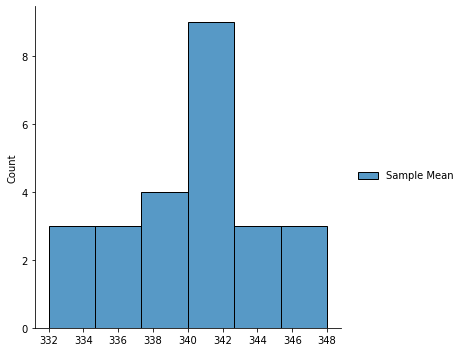

In [14]:
# step 1: Write a function to generate a dataset containing all possible sample combination from the population
def generateSamples(X, Y, n):
    for x in X:
        for y in X:
            sample = [x,y]
            sampleMean = (x+y)/2
            Y.append([sample, sampleMean])
    return Y

Y = []
n = 2
Y = generateSamples(X, Y, n)
Y = pd.DataFrame(Y, columns=['Sample', 'Sample Mean'])
Y
sns.displot(Y)
# step 2: The "sampling distribution Mean" should be the same as the mean calculated in the first part (population mean)
DistSampleMean = Y["Sample Mean"].mean()
print("Distribution of Sample Mean: "+ str(DistSampleMean))

# step 3: The "sampling distribution variance" is given by the following:
SampleDistVariance = Xvariance/len(X)
print("Distribution of Sample Mean - Variance: "+ str(SampleDistVariance))


# - CALCULATE THE SAMPLE VARIANCE
# The variance of the sampling distribution of the mean is computed as follows
# - RECALCULATE THE SAMPLE MEAN AND VARIANCE USING THE FORMULA WITH POPULATION VARIABLES (sample dist mean = pop mean; but s2 has a formula...)
# - Maybe add another exercise from the annexes...



## Exercise p14: Sampling Mean (same as before...)

### We're doing the same thing as in the previous exercise. This time, no dataset to deal with, just some descriptive stats..
- We know the population mean and standard deviation
- We also know that the distribution of the data follows a normal distribution
- We're trying to infer the probability of having a sample of 15 element with a mass above 5.3g

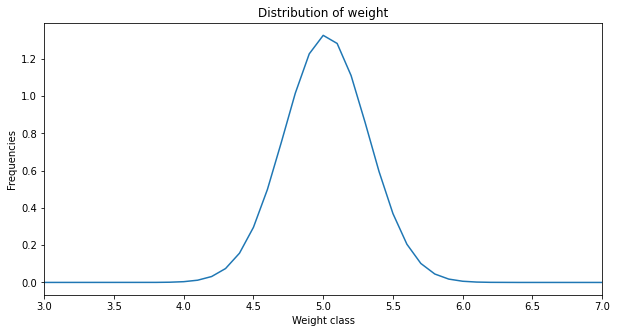

In [21]:
# step 1: just plot a normal distribution with the parameters given in the text:
#--------------------------------------------------------------
#create a numpy array with values (start, stop, step...)
X_billes = np.arange(start=-10, stop=10, step=0.1)
#parameters of the distribution
mu = 5.02
sigma = 0.3


#[STEP-1]--------------------------------------------------------------------------------------------------------------
#function to calculate the Y values of the X array using the mathematical expression of the "normal distribution"
def normalDistrib(X, Y, mu, sigma):
    for x in X:
        Y1=(1/np.sqrt(2*np.pi*np.square(sigma)))
        Y2= math.exp((-1/2)*np.square((x-mu)/sigma))  
        Y3 = Y1 * Y2
        Y.append(Y3)
    return Y

#[STEP-2]--------------------------------------------------------------------------------------------------------------
#the empty array of a variable size that'll store the return of the fucntion created above
Y_billes = []
Y_billes = normalDistrib(X_billes, Y_billes, mu, sigma)
Y_billes

#[STEP-3]--------------------------------------------------------------------------------------------------------------
#Plot the thing
f, ax = plt.subplots(figsize=(10,5)) #to set up the size of the figure,
plt.xlim(3,7)  # set up the plot limits
plt.plot(X_billes, Y_billes)
plt.title("Distribution of weight")
plt.xlabel("Weight class")
plt.ylabel("Frequencies")
plt.show()
#Not my best plot... gotta change the scale


- Plotting this first distribution wasn't really necessary for solving this question.
- Now we're just gonna use those population parameters to calculate the parameters for the distribution of sample means and plot that distribution. 
- We already know that the distribution of sample means will follow the normal distribution, so we'll be able to use it to calculate the probabilities we're looking for...